In [42]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
cens=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")

In [3]:
#EXPLORATORY ANALYSIS
#overview of data
cens.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
n_records=cens.shape[0]
# Total number of features
n_features = cens.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = cens[cens['Income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = cens[cens['Income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32560
Total number of features: 15
Individuals making more than $50k: 24719
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


In [6]:
#data cleaning
cens.drop('Education', inplace=True, axis=1)
cens.columns.tolist()



['Age',
 'Workclass',
 'Fnlwgt',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [7]:
#checking null values 
cens.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
#checking duplicates and remove it 
print("Before removing duplicates:", cens.duplicated().sum())
cens= cens[~cens.duplicated()]

print("After removing duplicates:",cens.duplicated().sum())




Before removing duplicates: 24
After removing duplicates: 0


In [9]:
cens.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

In [10]:
#removes spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    cens[column] = cens[column].str.strip()

In [11]:
#after removing value count of sex
cens.Sex.value_counts()

Male      21774
Female    10762
Name: Sex, dtype: int64

In [12]:
#data exploration
cens.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


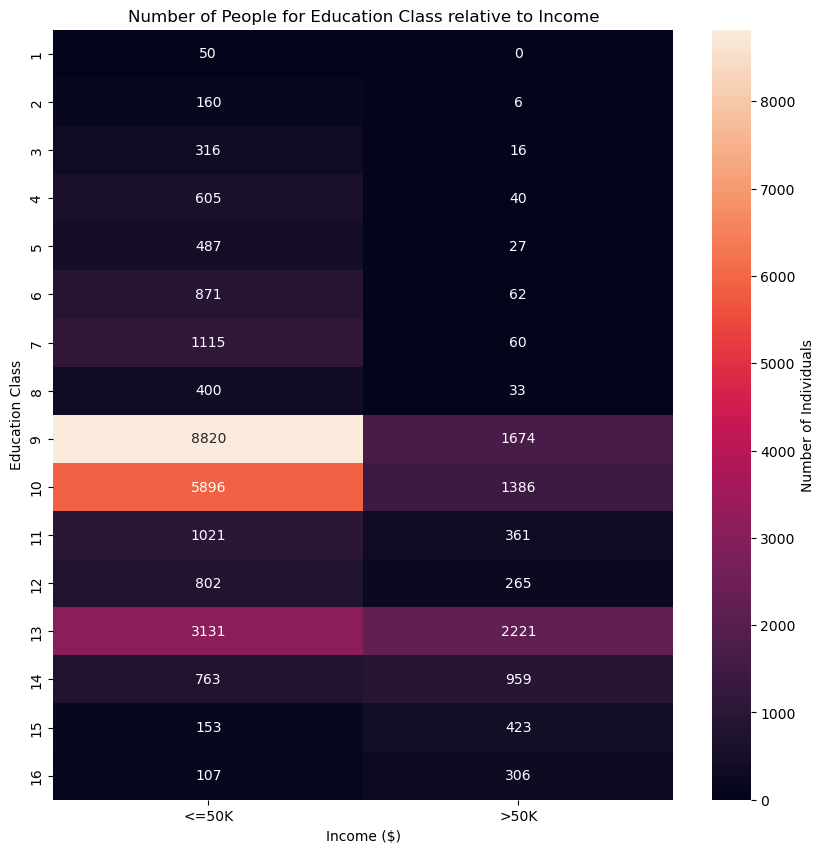

In [13]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = cens.groupby(['Education_num', 'Income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');


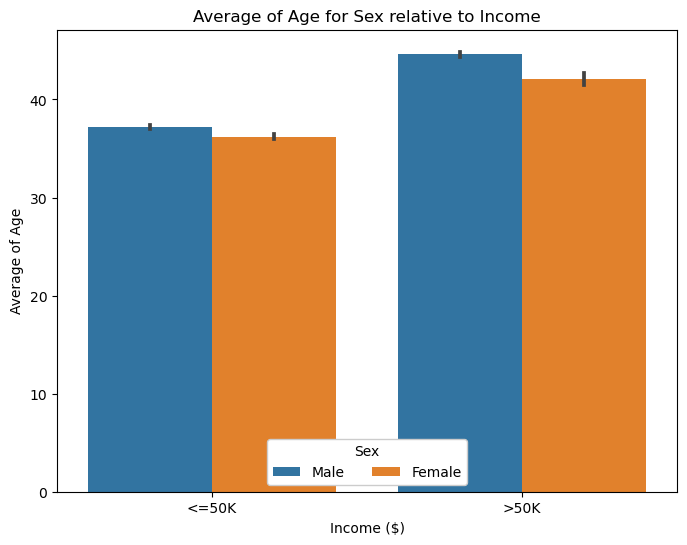

In [14]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = cens, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

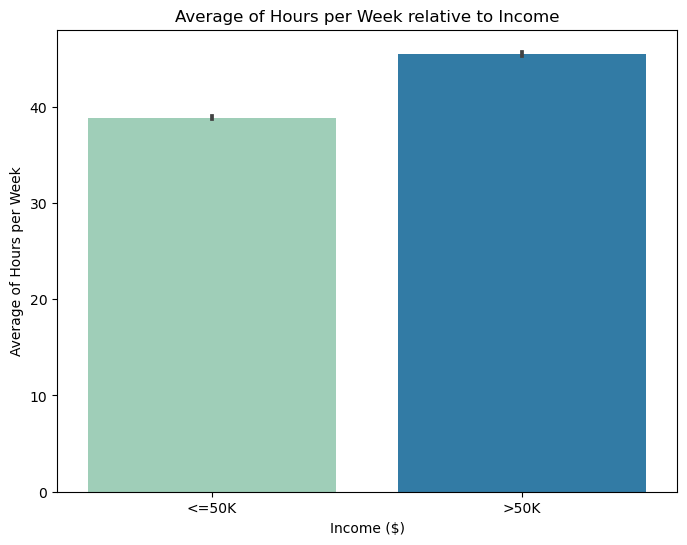

In [15]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=cens, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Handlers-cleaners'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, '?'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

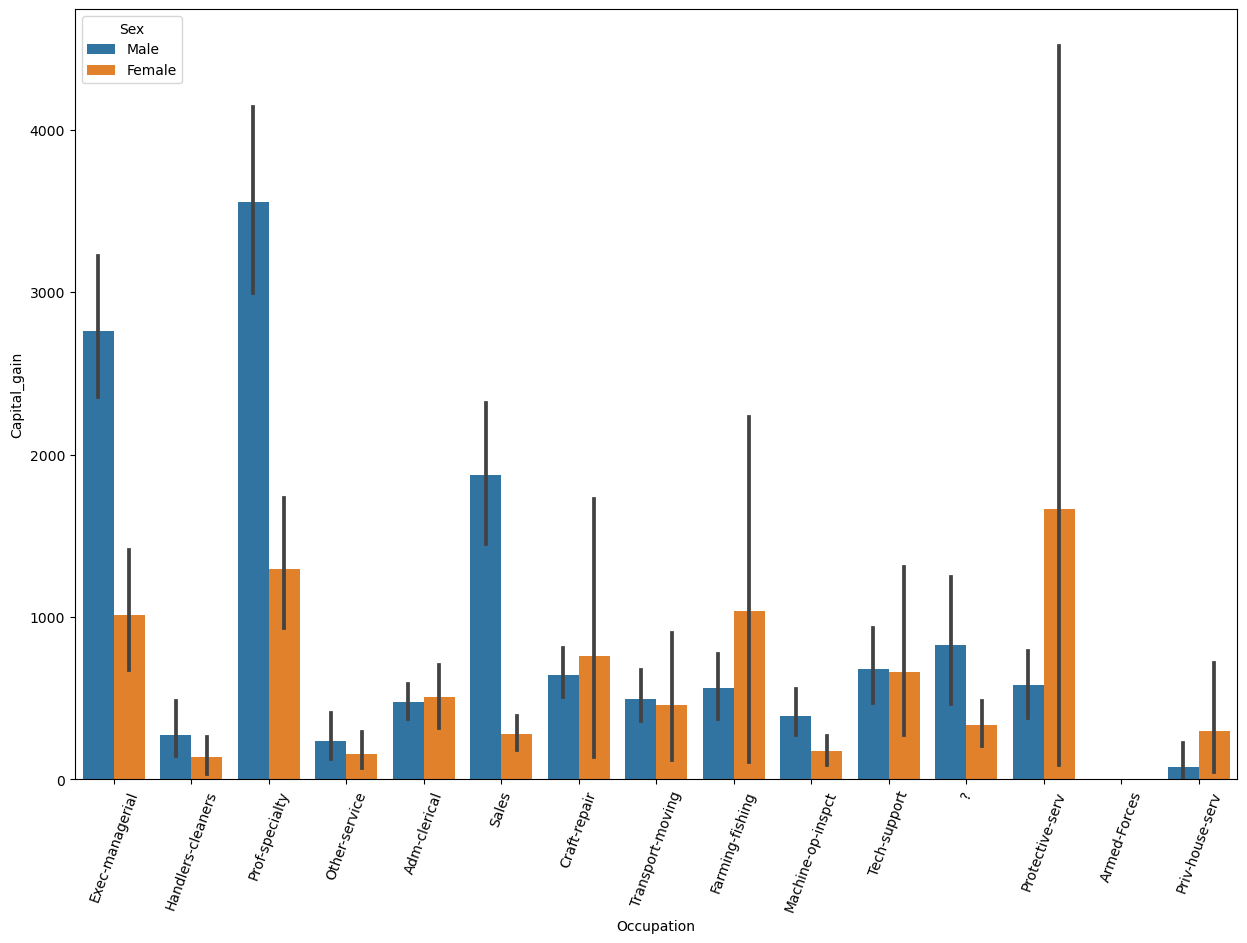

In [16]:
plt.figure(figsize=(15,10))
sb.barplot(x='Occupation',y='Capital_gain',data=cens,hue='Sex')
plt.xticks(rotation=70)

In [17]:
#data preprocessing
cens_prep = cens.copy()

In [18]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

scaler = MinMaxScaler()
cens_prep[numerical] = scaler.fit_transform(cens_prep[numerical])

In [19]:
cens_prep.sample(3)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4266,0.438356,Private,329603,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.436639,0.397959,United-States,>50K
26964,0.068493,Local-gov,412316,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0.0,0.000000,0.397959,United-States,<=50K
23191,0.027397,?,45643,10,Never-married,?,Own-child,White,Female,0.0,0.000000,0.244898,United-States,<=50K


In [54]:
# Encode categorical variables
label_encoders = {}
for column in cens.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    cens[column] = label_encoders[column].fit_transform(cens[column])

In [48]:
# Separate features and target variable
X = cens.drop('Income', axis=1)
y = cens['Income']

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(report)

Model Accuracy: 80.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4961
           1       0.66      0.40      0.50      1547

    accuracy                           0.81      6508
   macro avg       0.75      0.67      0.69      6508
weighted avg       0.79      0.81      0.79      6508

